## Analysis of the Data from Goodreads Website
### Quotes Dataset

---
[Kaggle link](https://www.kaggle.com/datasets/abhishekvermasg1/goodreads-quotes)

People often turn to quotes and sayings for inspiration, motivation, or a fresh perspective on life. Famous individuals leave an enduring mark on culture through their words, shaping entire eras and inspiring millions. This raises intriguing questions: who are these people whose words resonate the most with modern audiences? Which quotes capture the most attention, and what makes them so inspiring?

This analysis is based on a dataset of inspirational quotes collected from the popular platform **Goodreads**. Goodreads is one of the most renowned online communities for book lovers, where users can share their favorite quotes, interact with content, and express their preferences by liking quotes. The dataset includes:
- **Quotes** that capture the interest of Goodreads users.
- **Authors** behind these quotes.
- **Tags** that describe the content of the quotes (e.g., inspiration, love, life).
- **Number of Likes**, indicating the popularity and resonance of the quotes among users.

### Books Dataset
---
[Kaggle link](https://www.kaggle.com/datasets/jealousleopard/goodreadsbooks)

Key features:
- **Title**: The name of the book.
- **Author**: The writer of the book.
- **Average Rating**: The average user rating on Goodreads.
- **Number of Pages**: The total number of pages in the book.
- **ISBN / ISBN13**: Unique identifiers for the books, which were used to retrieve additional data from the Google Books API.
- **Publication Date**: The year or full date when the book was published.
- **Publisher**: The name of the publishing company.
- **Ratings Count / Text Reviews Count**: Number of ratings and textual reviews the book received.

This dataset serves as the foundation for our analysis, particularly in relation to genre classification and rating trends.

In [ ]:
import kagglehub
import requests
import time 
from time import sleep
from tqdm import tqdm
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot
from concurrent.futures import ThreadPoolExecutor

### Download the dataset with quotes

In [ ]:
# path = kagglehub.dataset_download("abhishekvermasg1/goodreads-quotes")
# print("Path to dataset files:", path)

In [ ]:
file_path = 'data/quotes.csv'
df_quotes = pd.read_csv(file_path)

### Preprocessing

In [ ]:
df_quotes = df_quotes.drop(columns=["index"])

In [ ]:
df_quotes.dtypes

#### Sorting rows

In [ ]:
df_quotes = df_quotes.sort_values(by="likes", ascending=False)

#### Delete the rows with '?'

In [ ]:
df_quotes = df_quotes[~df_quotes['author'].str.contains(r'\?', na=False)]
df_quotes = df_quotes[~df_quotes['quote'].str.contains(r'\?', na=False)]

#### Remove commas at the end of author names

In [ ]:
df_quotes['author'] = df_quotes['author'].str.rstrip(',')

In [ ]:
# df_quotes

In [ ]:
unique_autor_names = df_quotes["author"].unique()
unique_autor_names = list(unique_autor_names)
# unique_autor_names

df_quotes = df_quotes[df_quotes['author'].apply(str) != "Paulo Coelho"]

### Download the final df

In [ ]:
# df_quotes.to_csv("df_quotes.csv", index=False, encoding='utf-8')

### Data Visualisations

### Which authors have the most quotes?

In [ ]:
top_authors = df_quotes['author'].value_counts().head(10).reset_index()
top_authors.columns = ['author', 'quote_count']

In [ ]:
fig = px.bar(
    top_authors,
    x='quote_count',
    y='author',
    labels={'quote_count': 'Number of Quotes', 'author': 'Author'},
    text='quote_count'
)

fig.update_traces(textposition='outside', marker_color='#AA4761')

fig.update_layout (
    yaxis=dict(
        categoryorder='total ascending'
    ),
    title="Top Authors with the Highest Number of Quotes",
    title_font=dict(size=18),
    xaxis=dict(showgrid=False), 
    title_x=0.5,
    plot_bgcolor="rgba(240, 240, 240, 1)",
    width=1000,
    height=600,
    showlegend=False,
)

fig.show()

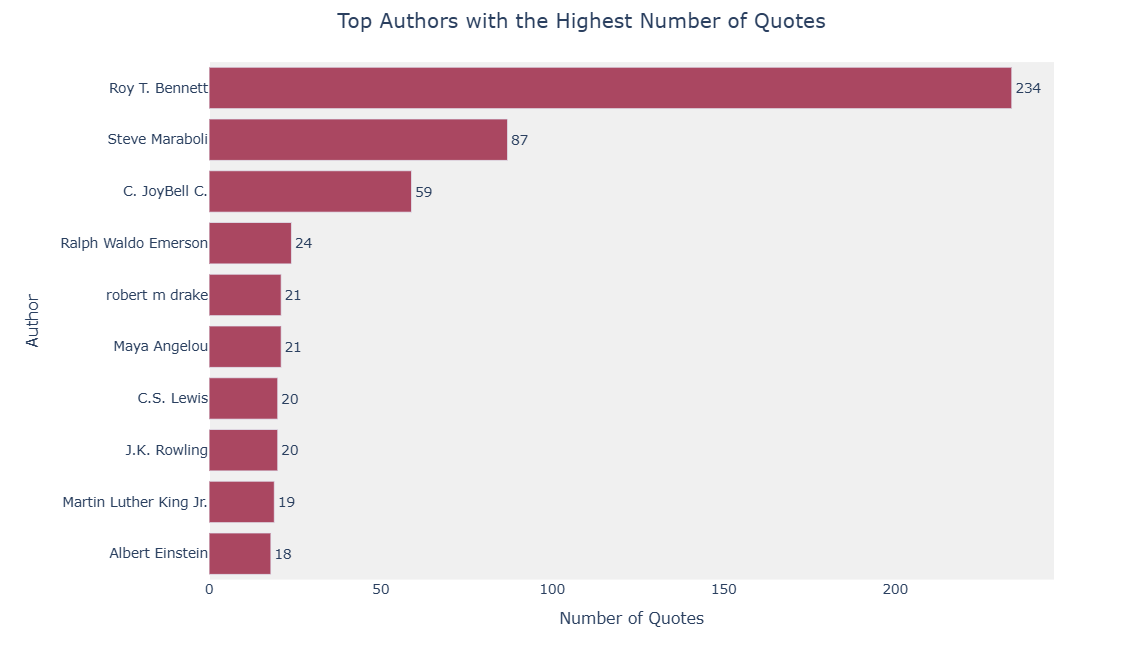

This graph highlights the most prolific authors of inspirational quotes on Goodreads, shedding light on figures whose words resonate most with readers. **Roy T. Bennett** dominates with 234 quotes, showcasing his influence as a modern motivational writer known for his uplifting and practical wisdom. **Steve Maraboli**, with 87 quotes, is another contemporary voice, celebrated for his empowering messages about life and personal growth. **C. JoyBell C.**, ranking third with 59 quotes, is a poet and philosopher whose reflective insights on emotions and self-discovery captivate readers.

The presence of historical and literary icons like **Ralph Waldo Emerson, Maya Angelou, Martin Luther King Jr.**, and **Albert Einstein** demonstrates the timeless appeal of their words. **Emerson**, a transcendentalist, shaped philosophical thought in the 19th century, while **Angelou's** quotes reflect her legacy as a poet and civil rights activist. **King’s** inspirational rhetoric continues to define movements for justice, and **Einstein’s** reflections on creativity and curiosity reveal his depth beyond science. This blend of modern motivators and historical icons illustrates the universal power of words to inspire across generations and contexts.

In [ ]:
top_liked_quotes = df_quotes.nlargest(5, 'likes')[['quote', 'likes', 'author']]
# top_liked_quotes

### Top 5 Most Liked Quotes

1. **Be yourself; everyone else is already taken.** - *Oscar Wilde* 


   *Likes:* 149,270

2. **You've gotta dance like there's nobody watching.** - *William W. Purkey*

   *Likes:* 118,888

3. **Be the change that you wish to see in the world.** - *Mahatma Gandhi*

   *Likes:* 106,749

4. **No one can make you feel inferior without your consent.** - *Eleanor Roosevelt*


   *Likes:* 85,854

5. **Live as if you were to die tomorrow. Learn as if you were to live forever.**  - *Mahatma Gandhi*


   *Likes:* 73,033

### Top authors by likes

In [ ]:
author_avg_likes = df_quotes.groupby('author')['likes'].mean().reset_index()
top_avg_liked_authors = author_avg_likes.nlargest(10, 'likes')
top_avg_liked_authors['likes'] = top_avg_liked_authors['likes'].round(1)

fig = px.bar(
    top_avg_liked_authors,
    x='likes',
    y='author',
    orientation='h',
    labels={'likes': 'Average Likes', 'author': 'Author'},
    title="Top Authors by Average Likes ❤️",
    text='likes'
)

fig.update_traces(textposition='outside', marker_color='#AA4761')
fig.update_layout(
    yaxis=dict(categoryorder='total ascending', title="Authors"),
    title_font=dict(size=18),
    xaxis=dict(showgrid=False, title="Average Likes"), 
    title_x=0.5,
    plot_bgcolor="rgba(240, 240, 240, 1)",
    width=1400,
    height=700
)

fig.show()

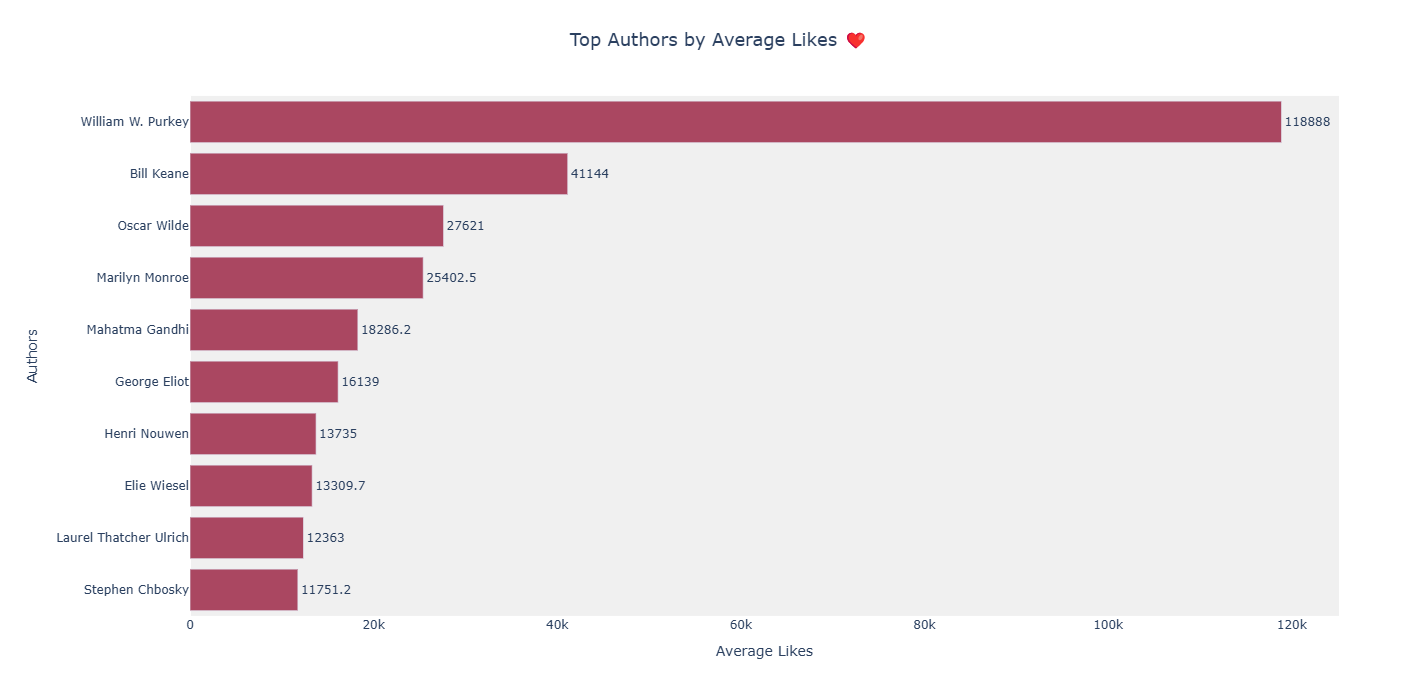

This graph highlights the authors with the highest average likes per quote, showcasing those whose words resonate most deeply with audiences. **William W. Purkey** stands out significantly, with an impressive average of over 118,000 likes per quote, indicating the widespread appeal of his motivational and uplifting messages. Other notable figures include **Bill Keane, Oscar Wilde**, and **Marilyn Monroe**, each reflecting diverse styles—from humor and wit to timeless philosophical insights.

The presence of historical icons like **Mahatma Gandhi** and literary figures such as **George Eliot** demonstrates how quotes rooted in profound wisdom and universal truths continue to inspire across generations. This analysis emphasizes the enduring power of well-crafted words and their ability to connect deeply with readers worldwide.

### Downloading the Dataset with the list of books

In [ ]:
# path = kagglehub.dataset_download("jealousleopard/goodreadsbooks")

### Preprocesing

In [ ]:
file_path = 'data/books.csv'
df_books = pd.read_csv(file_path, on_bad_lines='skip')

In [ ]:
df_books.set_index('bookID', inplace=True)

In [ ]:
df_books.dtypes

In [ ]:
df_books['publication_date'] = pd.to_datetime(df_books['publication_date'], format='%m/%d/%Y', errors='coerce')

In [ ]:
# df_books

### Data Visualisations

### Exploring the Linguistic Diversity of Books Published on Goodreads

In [ ]:
unique_languag = df_books['language_code'].unique()
unique_languag

In [ ]:
language_dict = {
    'eng': 'English',
    'en-US': 'English (US)',
    'fre': 'French',
    'spa': 'Spanish',
    'en-GB': 'English (UK)',
    'mul': 'Multiple Languages',
    'grc': 'Ancient Greek',
    'enm': 'Middle English',
    'en-CA': 'English (Canada)',
    'ger': 'German',
    'jpn': 'Japanese',
    'ara': 'Arabic',
    'nl': 'Dutch',
    'zho': 'Chinese',
    'lat': 'Latin',
    'por': 'Portuguese',
    'srp': 'Serbian',
    'ita': 'Italian',
    'rus': 'Russian',
    'msa': 'Malay',
    'glg': 'Galician',
    'wel': 'Welsh',
    'swe': 'Swedish',
    'nor': 'Norwegian',
    'tur': 'Turkish',
    'gla': 'Scottish Gaelic',
    'ale': 'Aleut'
}

In [ ]:
df_books['language_code'] = df_books['language_code'].map(language_dict)

In [ ]:
df_books.rename(columns={'language_code': 'language'}, inplace=True)

In [ ]:
# df_books

### Distribution of Books by Language

In [ ]:
language_distribution = df_books['language'].value_counts().reset_index()
language_distribution.columns = ['language', 'count']
language_distribution['percentage'] = (language_distribution['count'] / language_distribution['count'].sum()) * 100

pie_data = language_distribution[language_distribution['percentage'] >= 1.5]
other_data = language_distribution[language_distribution['percentage'] < 1.5]

if not other_data.empty:
    other_count = other_data['count'].sum()
    other_row = pd.DataFrame([{
        'language': 'Other',
        'count': other_count,
        'percentage': other_count / language_distribution['count'].sum() * 100
    }])
    pie_data = pd.concat([pie_data, other_row], ignore_index=True)

colors = [
    '#D46A79',  # Cinnamon Satin
    '#F6CBB6',  # Apricot
    '#AA4761',  # Persian Plum
    '#F5E6F1',  # Lavender Blush
    '#65000B',  # Rosewood
    '#FFB3C1',  # Blush Pink
    '#FFC1A1',  # Deep Peach
    '#E9897E',  # Burnt Coral
    '#8B0000',  # Wine Red
    '#7B4D7E',  # Orchid Purple
    '#D4A59A',  # Dusty Rose
    '#5C246E',  # Plum
    '#BFB3D0'   # Mauve Mist
]   
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.6, 0.4],
    specs=[[{'type': 'bar'}, {'type': 'pie'}]],
)

fig.add_trace(
    go.Bar(
        x=language_distribution['language'],
        y=language_distribution['count'],
        name='Bar Chart',
        marker=dict(color=colors[:len(language_distribution)]),
        showlegend=False
    ),
    row=1, col=1
)

fig.add_trace(
    go.Pie(
        labels=pie_data['language'],
        values=pie_data['count'],
        name='Pie Chart',
        textinfo='label+percent',
        hoverinfo='label+percent+value',
        marker=dict(colors=colors[:len(pie_data)])
    ),
    row=1, col=2
)

fig.update_layout(
    title="Distribution of Books by Language",
    title_x=0.5,
    height=600,
    width=1400,
    plot_bgcolor="rgba(240, 240, 240, 1)"
)

fig.update_xaxes(title="Language", tickangle=45, showgrid=False, row=1, col=1)
fig.update_yaxes(title="Number of Books", row=1, col=1)
plot(fig, filename='dashboard/charts/chart_1.html', auto_open=False)
fig.show()

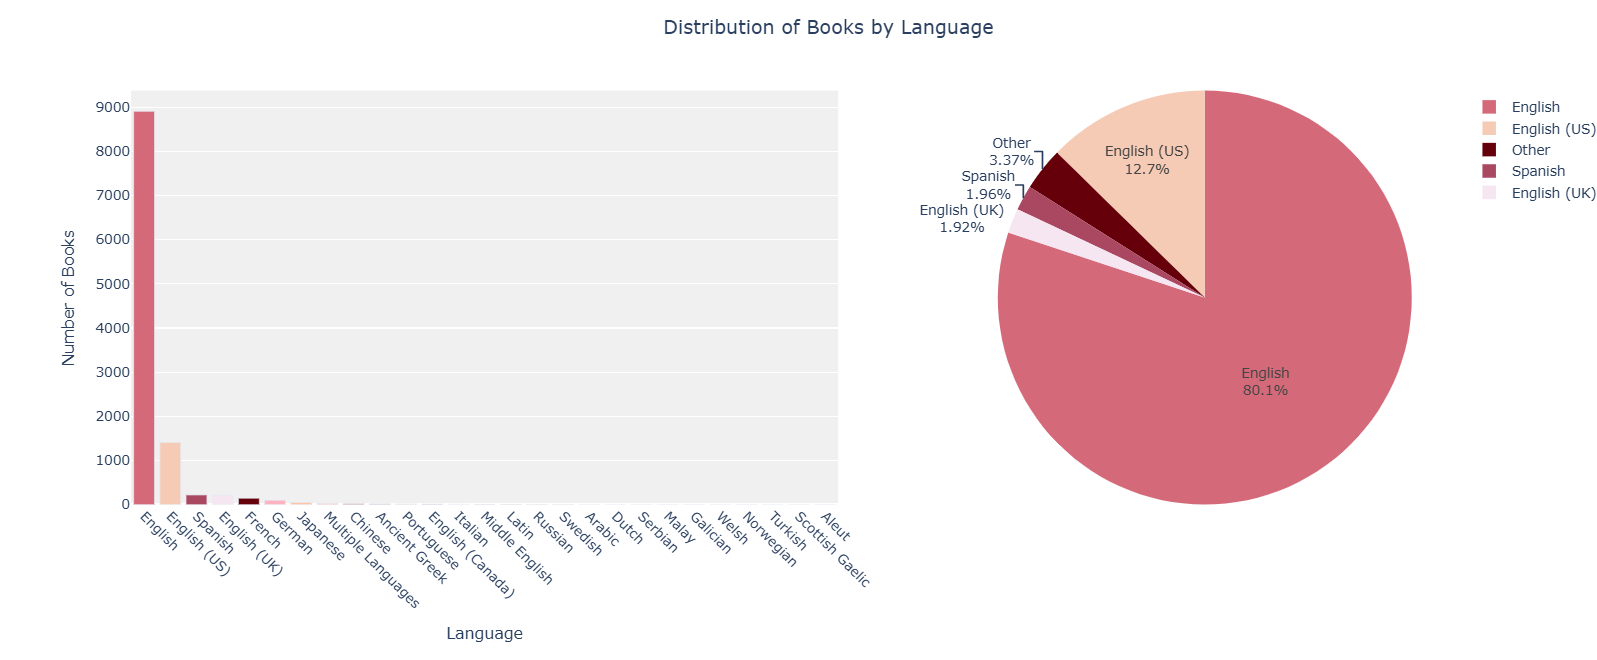

From the chart, we can observe that the majority of books on Goodreads are in English, but there is also a rich linguistic diversity overall. To take a closer look at this diversity, let's remove all variations of the English language and examine the next chart.

### Distribution of Non-English Books by Language

In [ ]:
non_english_books = df_books[~df_books['language'].isin(['English', 'English (US)', 'English (UK)', 'English (Canada)'])]

non_english_language_distribution = non_english_books['language'].value_counts().reset_index()
non_english_language_distribution.columns = ['language', 'count']

non_english_language_distribution['percentage'] = (non_english_language_distribution['count'] / non_english_language_distribution['count'].sum()) * 100

pie_data = non_english_language_distribution[non_english_language_distribution['percentage'] >= 2]
other_data = non_english_language_distribution[non_english_language_distribution['percentage'] < 2]

if not other_data.empty:
    other_count = other_data['count'].sum()
    other_row = pd.DataFrame([{
        'language': 'Other',
        'count': other_count,
        'percentage': other_count / non_english_language_distribution['count'].sum() * 100
    }])
    pie_data = pd.concat([pie_data, other_row], ignore_index=True)


In [ ]:
colors = [
    '#472950',  
    '#C0A4C4', 
    '#D46A79', 
    '#F6CBB6', 
    '#AA4761', 
    '#F5E6F1',  
    '#65000B', 
    '#FFB3C1', 
    '#FFC1A1',  
    '#E9897E',  
    '#8B0000',
    '#7B4D7E',  
    '#D4A59A', 
    '#5C246E', 
    '#BFB3D0'  
]    
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.6, 0.4],
    specs=[[{'type': 'bar'}, {'type': 'pie'}]],
)

fig.add_trace(
    go.Bar(
        x=non_english_language_distribution['language'],
        y=non_english_language_distribution['count'],
        name='Bar Chart',
        marker=dict(color=colors[:len(non_english_language_distribution)]),
        showlegend=False
    ),
    row=1, col=1
)

fig.add_trace(
    go.Pie(
        labels=pie_data['language'],
        values=pie_data['count'],
        name='Pie Chart',
        textinfo='label+percent',
        hoverinfo='label+percent+value',
        marker=dict(colors=colors[:len(pie_data)])
    ),
    row=1, col=2
)

fig.update_layout(
    title="Distribution of Non-English Books by Language",
    title_x=0.5,
    height=600,
    width=1400,
    plot_bgcolor="rgba(240, 240, 240, 1)"
)

    
fig.update_xaxes(title="Language", tickangle=45, showgrid=False, row=1, col=1)
fig.update_yaxes(title="Number of Books", row=1, col=1)
plot(fig, filename='dashboard/charts/chart_2.html', auto_open=False)
fig.show()

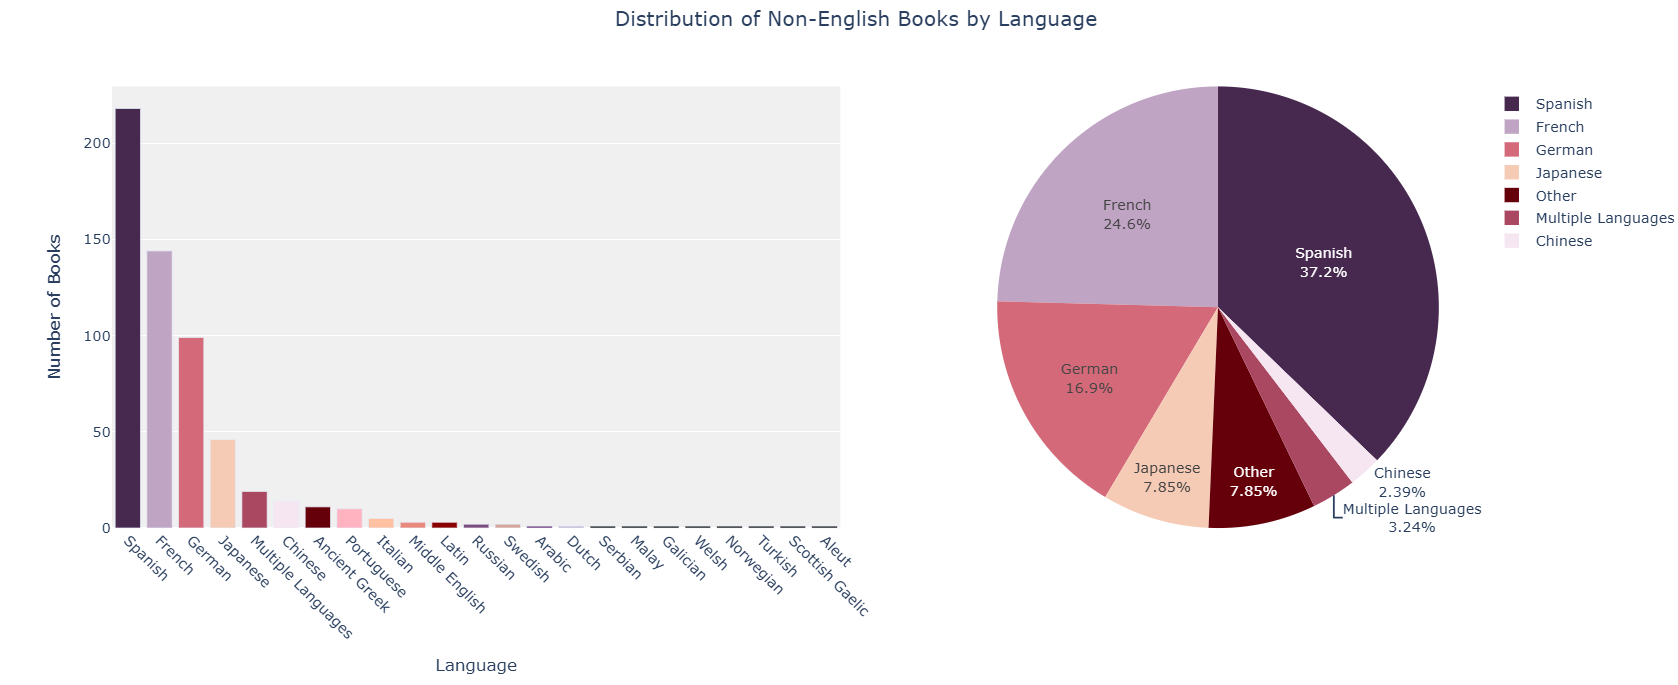

### Which Language's Literature Achieves the Highest Ratings?

In [ ]:
avg_rating_by_lang = df_books.groupby('language').agg(
    average_rating=('average_rating', 'mean'),
    book_count=('title', 'count')
).reset_index()

avg_rating_by_lang = avg_rating_by_lang[avg_rating_by_lang['book_count'] >= 10]
avg_rating_by_lang = avg_rating_by_lang.sort_values(by='average_rating', ascending=False)

In [ ]:
fig = px.bar(
    avg_rating_by_lang,
    x='language',
    y='average_rating',
    text='book_count',
    title='Average Ratings of Books by Language (With Minimum 10 Books)',
    labels={'language': 'Language', 'average_rating': 'Average Rating'},
    color_discrete_sequence=colors
)
fig.update_traces(marker_color='#AA4761')
fig.update_layout(
    xaxis=dict(title="Language", tickangle=45),
    yaxis=dict(title="Average Rating"),
    title_x=0.5,
    height=600,
    width=1000,
    plot_bgcolor="rgba(240, 240, 240, 1)"
)

plot(fig, filename='dashboard/charts/chart_3.html', auto_open=False)
fig.show()

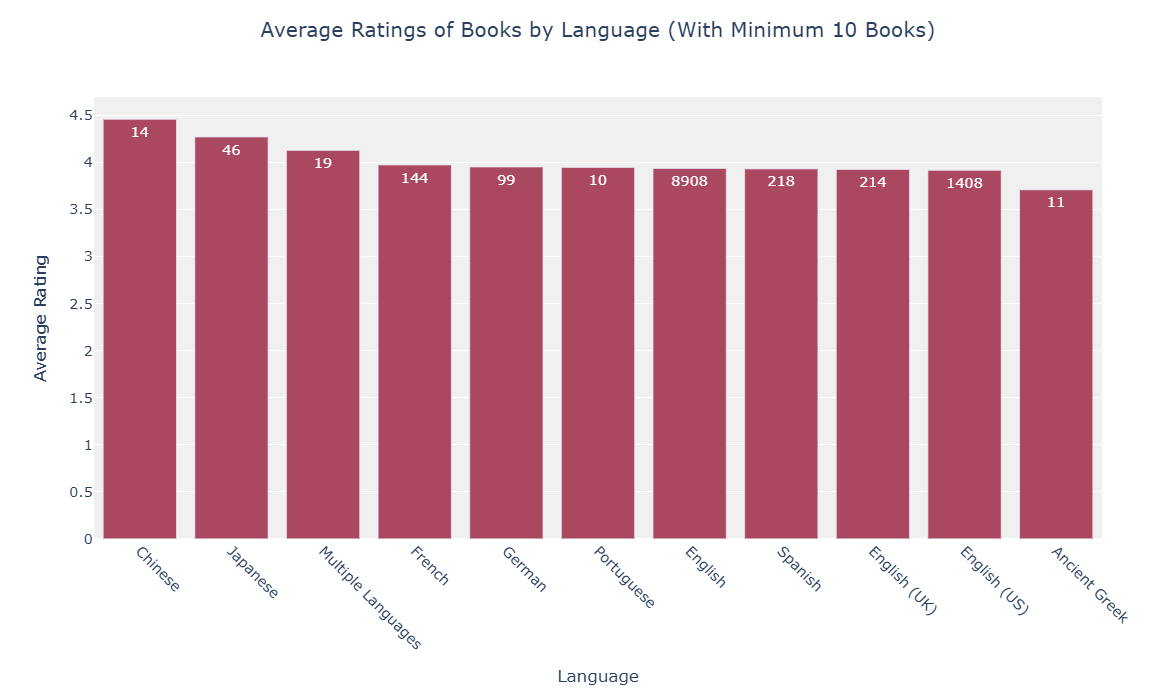

Interestingly, languages with a larger number of books, such as *English or  Spanish*, and *French*, show slightly **lower average ratings**, which could be attributed to **the greater diversity in the quality of books** within these languages. This analysis highlights that while the quantity of books in a particular language contributes to its prominence, languages with fewer but highly-rated books may excel in terms of literary impact.

### Analysis of book publishers

In [ ]:
# df_books

In [ ]:
publisher_count = df_books['publisher'].value_counts().reset_index()
publisher_count.columns = ['publisher', 'count']

top_publishers = publisher_count.head(10)

# Prepare data for the pie chart (including "Other")
pie_data = publisher_count.head(10)

colors = [
    '#472950',  # American Purple
    '#C0A4C4',  # Lilac
    '#D46A79',  # Cinnamon Satin
    '#F6CBB6',  # Apricot
    '#AA4761',  # Persian Plum
    '#F5E6F1',  # Lavender Blush
    '#65000B',  # Rosewood
    '#FFB3C1',  # Blush Pink
    '#FFC1A1',  # Deep Peach
    '#E9897E',  # Burnt Coral
    '#8B0000',  # Wine Red
    '#7B4D7E',  # Orchid Purple
    '#D4A59A',  # Dusty Rose
    '#5C246E',  # Plum
    '#BFB3D0'   # Mauve Mist
]


fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.6, 0.4],
    specs=[[{'type': 'bar'}, {'type': 'pie'}]],
    subplot_titles=["Top Publishers by Number of Books", "Publisher Distribution"]
)

fig.add_trace(
    go.Bar(
        x=top_publishers['count'],
        y=top_publishers['publisher'],
        orientation='h',
        name='Bar Chart',
        marker=dict(color=colors[:len(top_publishers)]),
        showlegend=False
    ),
    row=1, col=1
)

fig.add_trace(
    go.Pie(
        labels=pie_data['publisher'],
        values=pie_data['count'],
        name='Pie Chart',
        textinfo='label+percent',
        marker=dict(colors=colors[:len(pie_data)])
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title="Publisher Distribution by Number of Books",
    title_x=0.5,
    height=600,
    width=1400,
    plot_bgcolor="rgba(240, 240, 240, 1)"
)

# Customize axes
fig.update_xaxes(title="Number of Books", row=1, col=1)
fig.update_yaxes(title="Publisher", row=1, col=1, categoryorder='total ascending')

plot(fig, filename='dashboard/charts/chart_4.html', auto_open=False)

fig.show()

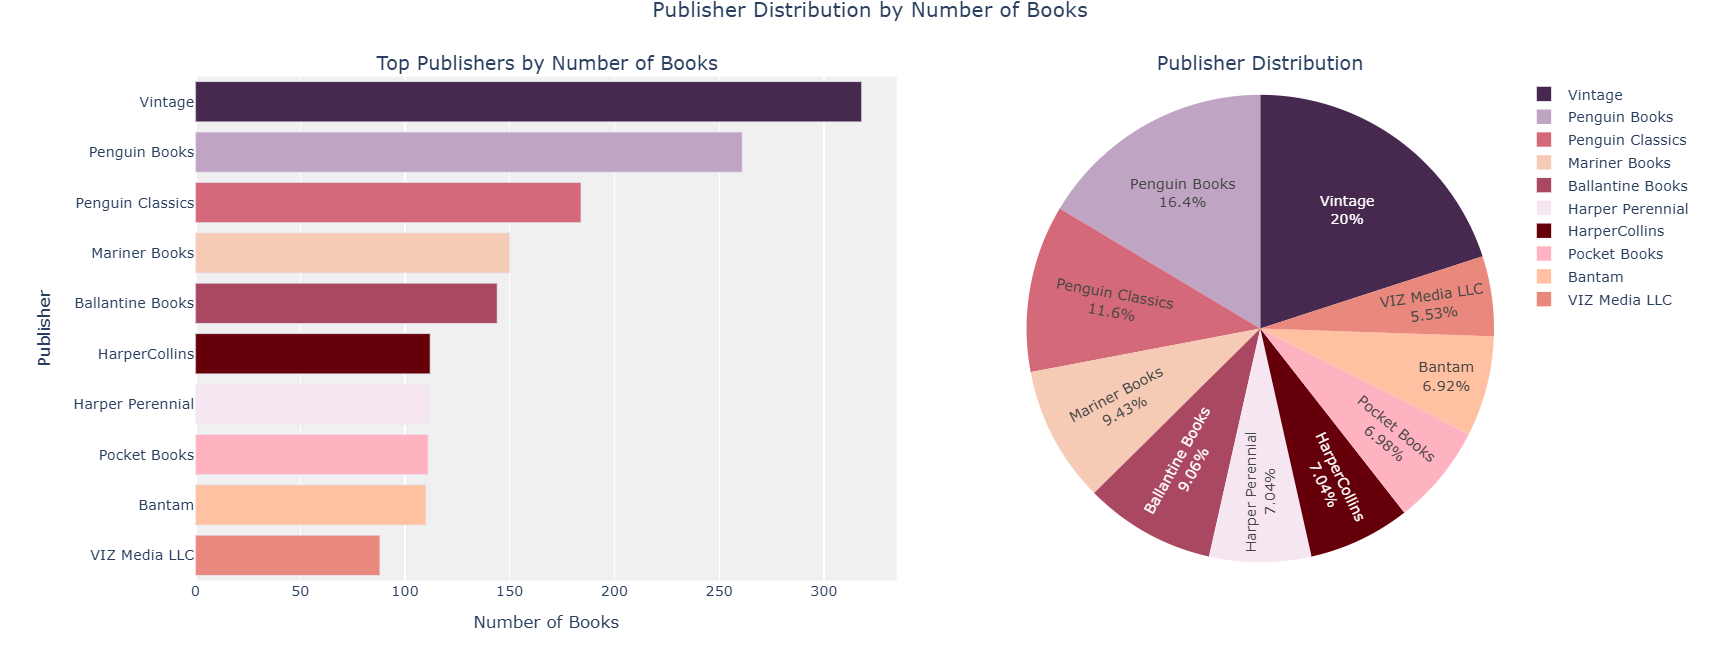

### Genres classification via Google Books API

The original Goodreads dataset does not include book genres. To enrich the data and enable genre-based analysis, we implemented an automated classification step using the [Google Books API](https://developers.google.com/books).

#### Methodology

1. **ISBN-Based Query**  
   For each book in the dataset with a valid `ISBN13`, a request is sent to the Google Books API endpoint:
   https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}
   
2. **Genre Extraction**  
The response is parsed to extract the `categories` field, which typically includes the book's genre(s). If available, only the first listed genre is used. If no genre is found, the book is labeled as `"Unknown"`.

3. **Description Extraction**  
The API response also includes a textual description of the book, which is stored for future text-based analysis or visualization.

4. **Rate Limiting**  
To avoid exceeding the API's rate limits, a delay (`sleep`) is introduced between requests. The function also handles HTTP 429 errors (Too Many Requests) by retrying after a pause.

#### Implementation

This functionality is implemented in two key functions:
- `get_book_info_from_google_books(isbn)`: Makes the API request and returns genre and description.
- `classify_books(df, isbn_column)`: Applies the above function to each ISBN in the dataframe, appending the genre and description to the dataset.

The results are stored in two new columns: `genre` and `description`.

This process enhances the dataset with valuable metadata, enabling more granular analysis by genre.


In [ ]:
def get_book_info_from_google_books(isbn):
    url = f"https://www.googleapis.com/books/v1/volumes?q=isbn:{isbn}"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        if "items" in data and len(data["items"]) > 0:
            volume_info = data["items"][0].get("volumeInfo", {})
            genres = volume_info.get("categories", [])
            genre = genres[0] if genres else "Unknown"
            description = volume_info.get("description", "No description")
            return genre, description
        else:
            return "Unknown", "No description"
    elif response.status_code == 429:  # Too many requests
        # print(f"Rate limit exceeded for ISBN {isbn}, retrying after delay...")
        time.sleep(5) 
        return get_book_info_from_google_books(isbn) 
    else:
        return "Error", f"Error: {response.status_code}"

In [ ]:
def classify_books(df, isbn_column):
    genres = []
    descriptions = []
    
    for isbn in tqdm(df[isbn_column], desc="Classifying books", unit="book"):
        if pd.notna(isbn):  # Skip rows with missing ISBNs
            genre, description = get_book_info_from_google_books(isbn)
            genres.append(genre)
            descriptions.append(description)
            time.sleep(1)  # Delay between requests to avoid API rate limits
        else:
            genres.append("Unknown")
            descriptions.append("No description available")
    
    df["genre"] = genres
    df["description"] = descriptions
    return df

In [ ]:
# df_books = classify_books(df_books, 'isbn13')

In [ ]:
# df_books.to_csv("df_books_genres.csv", index=False, encoding='utf-8')

In [ ]:
file_path = 'data/df_books_genres.csv'
df_books = pd.read_csv(file_path)

In [ ]:
# df_books

### Top Genres by Number of Books

In [ ]:
filtered_books = df_books[df_books['genre'] != "Unknown"]
genre_counts = filtered_books['genre'].value_counts().reset_index()
top_genres = genre_counts.head(10)

In [ ]:
genre_counts = df_books['genre'].value_counts().reset_index()
genre_counts.columns = ['genre', 'count']

fig = px.bar(
    top_genres,
    x='count',
    y='genre',
    orientation='h',
    title='Top Genres by Number of Books (Excluding Unknown)',
    labels={'count': 'Number of Books', 'genre': 'Genre'},
    text='count'
)
fig.update_traces(marker_color='#AA4761')
fig.update_layout(
    xaxis=dict(title='Number of Books'),
    yaxis=dict(title='Genre', categoryorder='total ascending'),
    title_x=0.5,
    height=700,
    width=1200,
    plot_bgcolor="rgba(240, 240, 240, 1)"
)
plot(fig, filename='dashboard/charts/chart_5.html', auto_open=False)
fig.show()

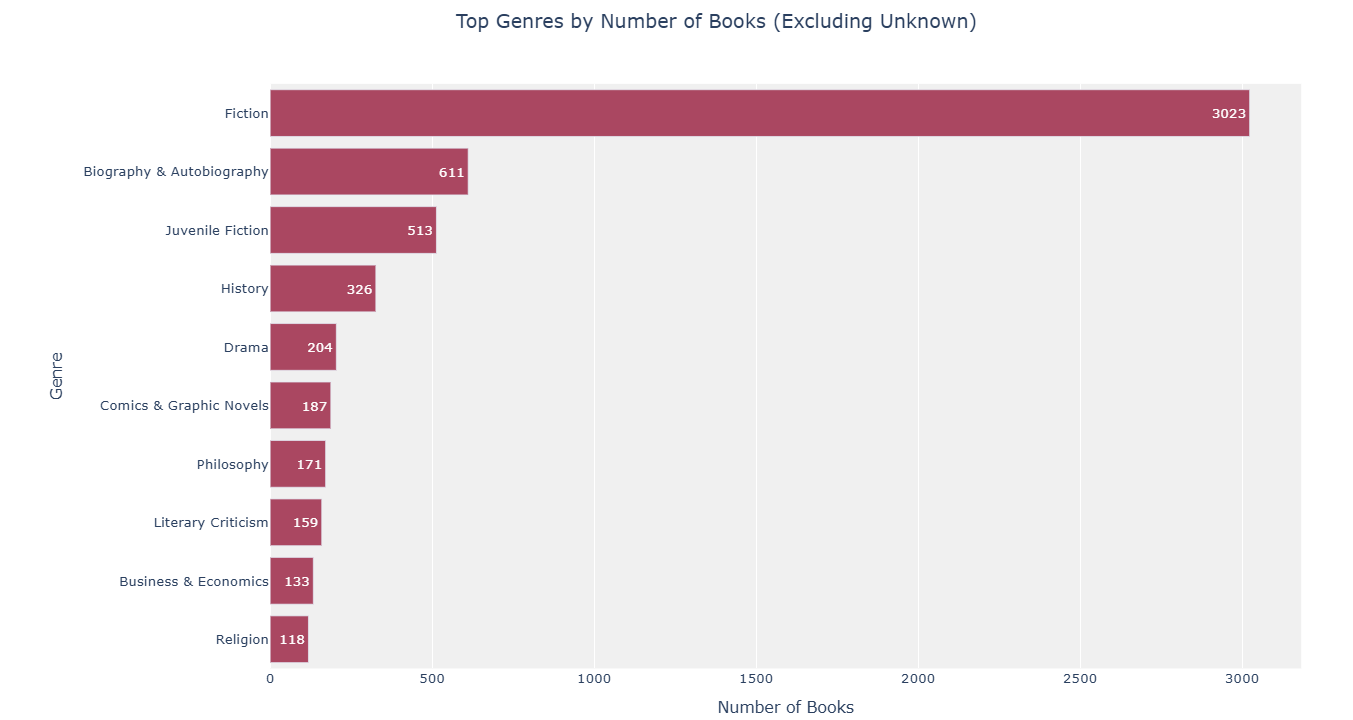

### Top Books by Text Reviews Count

In [ ]:
top_books = df_books.sort_values(by='text_reviews_count', ascending=False).head(10)

fig = px.bar(
    top_books,
    x='text_reviews_count', 
    y='title', 
    orientation='h',  
    title='Top 10 Books by Text Reviews Count',
    labels={'text_reviews_count': 'Text Reviews Count', 'title': 'Book Title'},
    text='text_reviews_count' 
)

fig.update_traces(marker_color='#FAC67A')
fig.update_layout(
    xaxis=dict(title='Number of Text Reviews'),
    yaxis=dict(title='Book Title', categoryorder='total ascending'),
    title_x=0.5,  
    height=700,  
    width=1200, 
    plot_bgcolor="rgba(240, 240, 240, 1)"  
)

plot(fig, filename='dashboard/charts/chart_6.html', auto_open=False)

fig.show()

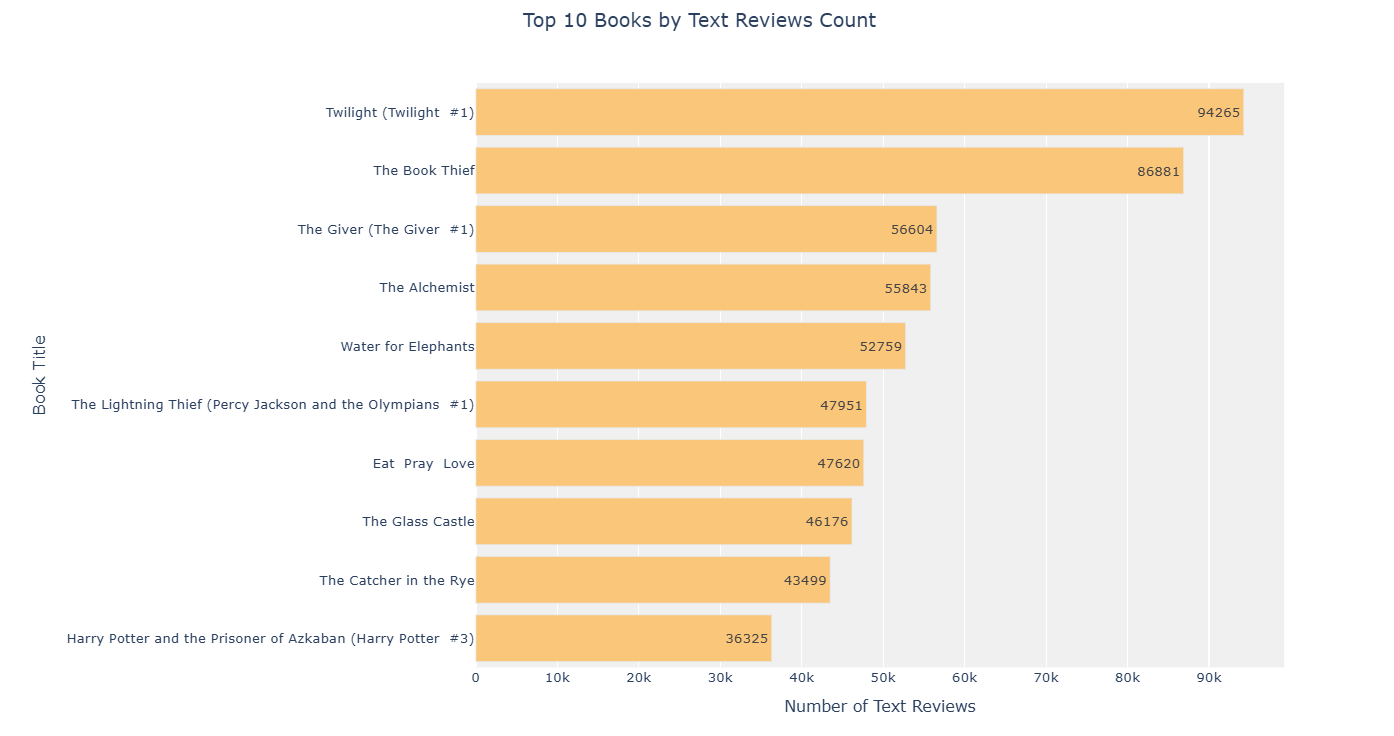